<a href="https://colab.research.google.com/github/osadly/Courses/blob/main/Assignment03(07JUL2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Assignment 3  <font color="blue"> (15 points) </font>

***

### Notes and Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries.
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly.
  + If we want you to use a specific library, then we will state it clearly.
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells.
  + Use text cells for explanations. Use explanation and plain text as much as possible.
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows:
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors.
    
  Good luck!

In [26]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

Go to <a href=#PartA>Part A</a>
<br>
Go to <a href=#PartB>Part B</a>
<br>
Go to <a href=#PartC>Part C</a>
<br>
Go to <a href=#PartD>Part D</a>
<br>
Go to <a href=#Q_C>Questions & Comments</a>


### **Importing Libraries**

In [27]:
# Importing necessary libraries

import numpy as np
import pandas as pd

import statsmodels.api as sm
#from sklearn.metrics import mean_squared_error
#from math import sqrt

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model, svm
#from sklearn.linear_model import LinearRegression, Lasso

from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score #, r2_score

#from sklearn.svm import SVR
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV

In [28]:
# helper functions
# 1) PrintSeparator to print lines of repeated characters passed as the second parameter for the number of lines passed in the first parameters
def PrintSeparator(nLines=1,ch='-'):
  for i in range(nLines):
    print(ch*100)

def cus_print(var):
  print("numpy_array of type:" , type(var))
  PrintSeparator(nLines=1)
  print(var)
  PrintSeparator(nLines=2,ch='=')

def cus_print_numpyarray(npAr, printArFlag=False):
  print("ndim:", npAr.ndim, ", shape: ",npAr.shape)
  PrintSeparator(nLines=1)
  if printArFlag:
    print(npAr)
  else:
    print("first_element=", npAr[0], "last elemnent=" , npAr[len(npAr)-1])

  PrintSeparator(nLines=2,ch='=')

Part A <a name='PartA' />

## **Part A** <font color="blue">(5 points)</font>

1. **<font color="blue">(1 point)</font>** Generate 100 points equally distanced from $-20$ to $20$ and save them in a `numpy` array `x1`. Now, create $4$ more `numpy` arrays by raising `x1` to the power of $2,3,4,5$, and call them `x2`, `x3`, `x4` and `x5`, respectively.
3. **<font color="blue">(1 point)</font>** Create your response `y`, a new `numpy` array, defined as $y= 1.75 + 5 x_1 + 0.05 x_3 - 10.3 x_5 + \varepsilon$, where $\varepsilon \sim \mathcal{N}(0, 4)$.
4. **<font color="blue">(2 points)</font>** Using $5$-fold cross-validation, with a reasonable train-test proportion, train a **lasso** regression model including all $x_1, x_2, x_3 , x_4 , x_5$, and for $10$ different  pre-determined tuning parameters.
5. **<font color="blue">(1 point)</font>** Plot the **cross-validated mean squared errors** vs the tuning parameter's values
 and chose the best tuning parameter based on the plot. Does the best model chosen perform **variable selection**?

### **A.1. Generate 100 points equally distanced from  −20  to  20  and save them in a numpy array x1. Now, create  4  more numpy arrays by raising x1 to the power of  2,3,4,5 , and call them x2, x3, x4 and x5, respectively.**


#### **A.1.1. Generate 100 points equally distanced from  −20 to 20 and save them in a numpy array x1**

In [29]:
x1 = np.linspace(-20,20,100)

cus_print_numpyarray(x1, True)

#print(min(x1), max(x1), len(x1))

ndim: 1 , shape:  (100,)
----------------------------------------------------------------------------------------------------
[-20.         -19.5959596  -19.19191919 -18.78787879 -18.38383838
 -17.97979798 -17.57575758 -17.17171717 -16.76767677 -16.36363636
 -15.95959596 -15.55555556 -15.15151515 -14.74747475 -14.34343434
 -13.93939394 -13.53535354 -13.13131313 -12.72727273 -12.32323232
 -11.91919192 -11.51515152 -11.11111111 -10.70707071 -10.3030303
  -9.8989899   -9.49494949  -9.09090909  -8.68686869  -8.28282828
  -7.87878788  -7.47474747  -7.07070707  -6.66666667  -6.26262626
  -5.85858586  -5.45454545  -5.05050505  -4.64646465  -4.24242424
  -3.83838384  -3.43434343  -3.03030303  -2.62626263  -2.22222222
  -1.81818182  -1.41414141  -1.01010101  -0.60606061  -0.2020202
   0.2020202    0.60606061   1.01010101   1.41414141   1.81818182
   2.22222222   2.62626263   3.03030303   3.43434343   3.83838384
   4.24242424   4.64646465   5.05050505   5.45454545   5.85858586
   6.26262626   6.

#### **A.1.2. Now, create  4  more numpy arrays by raising x1 to the power of  2,3,4,5 , and call them x2, x3, x4 and x5, respectively.**

In [30]:
# Define X as a numpy array of 2 dimensions 6*100:
#   6 as objective is to store a total of 6 arrays (x^0 up to x^5)
#   100 as we have one hundred elements for each of the 6 arrays
X = np.empty(shape=(6,100))
X[0].fill(0) # will not be used in this problem - added for the sake of making array index matching the power for x
X[1] = x1

for i in range(4):
    X[i+2,:] = np.array([pow(x1Elm,i+2) for x1Elm in x1])  # define X[2] as X1^2 and X3 as X[3] as X1^3 same applies to X4 and X5

# Validate
for i in range(6):
  cus_print_numpyarray(X[i])

# creating variables with exact variable names asked in the questions
x2 = X[2] #np.array([pow(z,2) for z in x1])
x3 = X[3] #np.array([pow(z,3) for z in x1])
x4 = X[4] #np.array([pow(z,4) for z in x1])
x5 = X[5] #np.array([pow(z,5) for z in x1])

ndim: 1 , shape:  (100,)
----------------------------------------------------------------------------------------------------
first_element= 0.0 last elemnent= 0.0
ndim: 1 , shape:  (100,)
----------------------------------------------------------------------------------------------------
first_element= -20.0 last elemnent= 20.0
ndim: 1 , shape:  (100,)
----------------------------------------------------------------------------------------------------
first_element= 400.0 last elemnent= 400.0
ndim: 1 , shape:  (100,)
----------------------------------------------------------------------------------------------------
first_element= -8000.0 last elemnent= 8000.0
ndim: 1 , shape:  (100,)
----------------------------------------------------------------------------------------------------
first_element= 160000.0 last elemnent= 160000.0
ndim: 1 , shape:  (100,)
----------------------------------------------------------------------------------------------------
first_element= -3200000.0 last

### **A.2. Create your response y, a new numpy array, defined as  𝑦=1.75+5𝑥1+0.05𝑥3−10.3𝑥5+𝜀  , where  𝜀∼N(0,4)**

In [31]:
b0 = 1.75
b1 = 5
b3 = 0.05
b5 = -10.3
##------------------------------------------------------------------------
# generate epsilon : eps
mu, sigma = 0, 4 # mean and standard deviation
#eps = np.random.normal(mu, sigma, 10000000)
eps = np.random.normal(mu, sigma, 100)
#eps
#print(abs( np.mean(eps)))
#print(abs(np.std(eps)))
##------------------------------------------------------------------------
y = b0 + b1*x1 + b3*x3 + b5*x5 + eps
cus_print_numpyarray(y)

ndim: 1 , shape:  (100,)
----------------------------------------------------------------------------------------------------
first_element= 32959508.656048805 last elemnent= -32959499.002750356


### **A.3. Using  5-fold cross-validation, with a reasonable train-test proportion, train a lasso regression model including all 𝑥1,𝑥2,𝑥3,𝑥4,𝑥5, and for  10  different pre-determined tuning parameters.**

#### **A.3.1. Create data frame**

In [32]:

# transpose X and consider ONLY columns from x1 to x5 (ignore X0)
X_trnsps = np.transpose(X)
X_IndVar = np.transpose(X)[:,1:]
cus_print_numpyarray(X_IndVar)
'''
# convert numpy array to pandas data frame
df = pd.DataFrame(data=X_IndVar) # values

# rename column names
for i in range(5):
  df.rename({df.columns[i]:"x"+str(i+1)},axis=1,inplace=True)

df.index.names = ['Index']

print("df.keys()=" , df.keys())
df.head()
df.tail()
df.shape
'''

ndim: 2 , shape:  (100, 5)
----------------------------------------------------------------------------------------------------
first_element= [-2.0e+01  4.0e+02 -8.0e+03  1.6e+05 -3.2e+06] last elemnent= [2.0e+01 4.0e+02 8.0e+03 1.6e+05 3.2e+06]


'\n# convert numpy array to pandas data frame\ndf = pd.DataFrame(data=X_IndVar) # values\n\n# rename column names\nfor i in range(5):\n  df.rename({df.columns[i]:"x"+str(i+1)},axis=1,inplace=True)\n\ndf.index.names = [\'Index\']\n\nprint("df.keys()=" , df.keys())\ndf.head()\ndf.tail()\ndf.shape\n'

#### **A.3.1. A reasonable train-test proportion**

In [33]:
# 33% data used for validation
X_train, X_test, y_train, y_test = train_test_split(X_IndVar, y, test_size=0.33, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
cus_print_numpyarray(X_train)
cus_print_numpyarray(y_train)
cus_print_numpyarray(X_test)
cus_print_numpyarray(y_test)

(67, 5) (67,)
(33, 5) (33,)
ndim: 2 , shape:  (67, 5)
----------------------------------------------------------------------------------------------------
first_element= [-8.68686869e+00  7.54616876e+01 -6.55525771e+02  5.69446629e+03
 -4.94670809e+04] last elemnent= [0.60606061 0.36730946 0.22261179 0.13491624 0.08176742]
ndim: 1 , shape:  (67,)
----------------------------------------------------------------------------------------------------
first_element= 509438.1213589793 last elemnent= 4.628879303468694
ndim: 2 , shape:  (33, 5)
----------------------------------------------------------------------------------------------------
first_element= [1.35353535e+01 1.83205795e+02 2.47975521e+03 3.35643634e+04
 4.54305525e+05] last elemnent= [1.43434343e+01 2.05734109e+02 2.95093368e+03 4.23265235e+04
 6.07107711e+05]
ndim: 1 , shape:  (33,)
----------------------------------------------------------------------------------------------------
first_element= -4679155.898024628 last elemnen

#### **A.3.2. Standardize/normalize Data first**

In [34]:
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
# dont train again on X_test. Standardization is a stateful transformation
X_test_std = scaler.transform(X_test)

#### **A.3.3. Using 5-fold cross-validation, with a reasonable train-test proportion, train a lasso regression model including all 𝑥1,𝑥2,𝑥3,𝑥4,𝑥5, and for 10 different pre-determined tuning parameters**

In [35]:
# Set up 5-fold cross-validation
k=5 # five folds as requested
kf = KFold(n_splits=k, shuffle=True, random_state=47)

# 10 different pre-determined tuning parameters for Lasso:
# 1- STEP 1: first start with 10 different values for the tuning parameter/alpha (from 10^-4 to 10*4)
alphas_1 = np.logspace(-4, 4, 10)
cus_print_numpyarray(alphas_1, True)

lasso_model_1 = linear_model.Lasso()
grid_1 = dict()
grid_1['alpha'] = alphas_1
search_1 = GridSearchCV(lasso_model_1,grid_1,cv=kf, scoring='neg_mean_squared_error')
search_1_results = search_1.fit(X_train_std, y_train)

# summarize search_1 results
print('Config: ', search_1_results.best_params_, "at index: ", search_1_results.best_index_ )
print('MAE: ', -1 * search_1_results.best_score_)
alphas_1_best = search_1_results.best_params_['alpha']
print("alphas_1_best=",alphas_1_best)

# 2- STEP 2: Generate a range of 10 values around the best value to come up with the best value
alphas_2 = np.linspace(alphas_1_best-100,alphas_1_best+100,10)
cus_print_numpyarray(alphas_2, True)

lasso_model_2 = linear_model.Lasso()
grid_2 = dict()
grid_2['alpha'] = alphas_2
search_2 = GridSearchCV(lasso_model_2,grid_2,cv=kf, scoring='neg_mean_squared_error')
search_2_results = search_2.fit(X_train_std, y_train)

# summarize search_2 results => final results
print('Config: ', search_2_results.best_params_, "at index: ", search_2_results.best_index_ )
print('MAE: ', -1 * search_2_results.best_score_)
alphas_2_best = search_2_results.best_params_['alpha']
print("alphas_2_best=",alphas_2_best)


# initilize LassoCV Model
#lasso_model = linear_model.LassoCV(cv=5, alphas=alphas_initial)
#lasso_model.fit(X_train_std, y_train)
#lasso_model.score(X_train_std, y_train)

# Perform cross validation
#cv_scores_std = cross_val_score(lasso_model, X_train_std, y_train, cv=kf, scoring='neg_mean_squared_error')
#print(f'Cross-validation scores: {cv_scores_std}')
#print(f'Mean CV score [cv_scores_std]: {-1*cv_scores_std.mean()}')

#cv_scores = cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
#print(f'Cross-validation scores: {cv_scores}')
#print(f'Mean CV score [cv_scores]: {-1*cv_scores.mean()}')

ndim: 1 , shape:  (10,)
----------------------------------------------------------------------------------------------------
[1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]
Config:  {'alpha': 1291.5496650148827} at index:  8
MAE:  21890956.613612752
alphas_1_best= 1291.5496650148827
ndim: 1 , shape:  (10,)
----------------------------------------------------------------------------------------------------
[1191.54966501 1213.77188724 1235.99410946 1258.21633168 1280.4385539
 1302.66077613 1324.88299835 1347.10522057 1369.32744279 1391.54966501]
Config:  {'alpha': 1213.771887237105} at index:  1
MAE:  20069802.0626656
alphas_2_best= 1213.771887237105


### **A.4. Plot the cross-validated mean squared errors vs the tuning parameter's values and chose the best tuning parameter based on the plot. Does the best model chosen perform variable selection?**

#### **A.4.1. Plot the cross-validated mean squared errors vs the tuning parameter's values**

<Figure size 1200x800 with 0 Axes>

Text(1181.5496650148827, 20204177.024564147, 'alpha=1191.55, MSE=20104177.02')

Text(1225.994109459327, 20867514.085193247, 'alpha=1235.99, MSE=20767514.09')

Text(1270.4385539037717, 21542058.299864758, 'alpha=1280.44, MSE=21442058.3')

Text(1314.882998348216, 23483337.34933263, 'alpha=1324.88, MSE=23383337.35')

Text(1359.3274427926606, 24690998.36108517, 'alpha=1369.33, MSE=24590998.36')

Text(1223.771887237105, 20169802.0626656, 'alpha=1213.77, MSE=20069802.06')

Text(1268.2163316815495, 21655122.06928239, 'alpha=1258.22, MSE=21555122.07')

Text(1312.6607761259938, 22463450.18118077, 'alpha=1302.66, MSE=22363450.18')

Text(1357.1052205704382, 23754298.01722779, 'alpha=1347.11, MSE=23654298.02')

Text(1401.5496650148827, 24912976.073688705, 'alpha=1391.55, MSE=24812976.07')

Text(0.5, 0, 'Tuning Parameter (alpha)')

Text(0, 0.5, 'Cross-validated Mean Squared Errors')

Text(0.5, 1.0, "Cross-validated MSE VS. Tuning Parameter's Values")

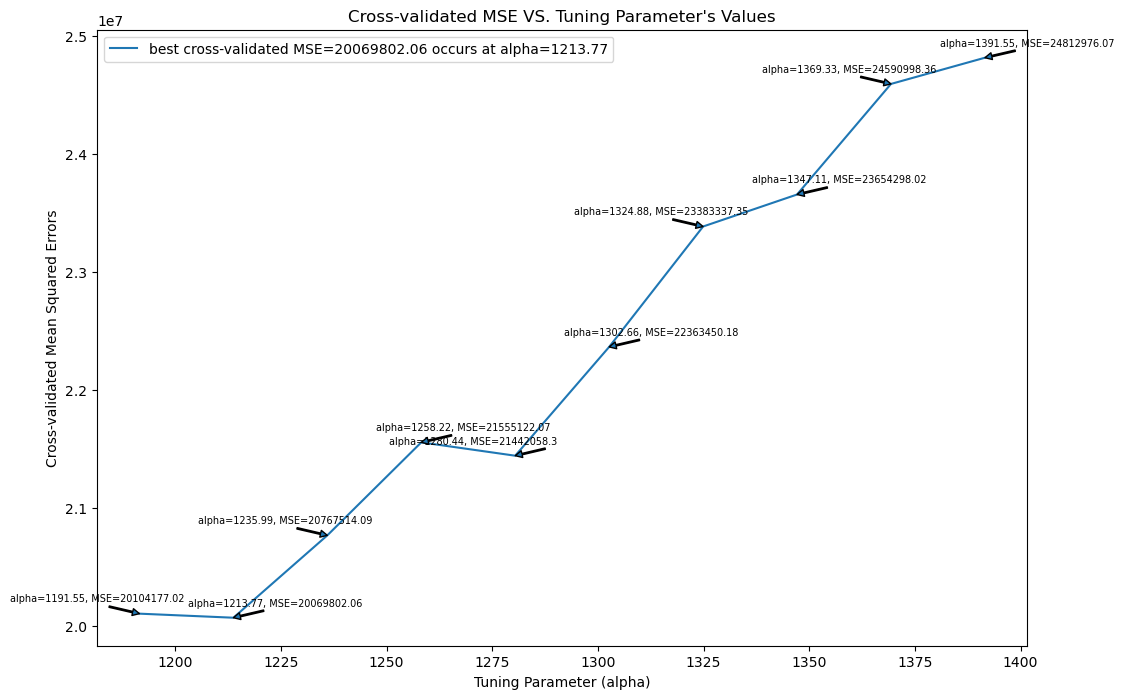

In [36]:
#print(-1*search_2_results.cv_results_['mean_test_score'])
plt.figure(figsize=(12,8))
#fig = plt.figure()
#alphas_2_best
#fig.add_subplot(211) #top left
plt.plot(alphas_2, -1*search_2_results.cv_results_['mean_test_score'])
#plt.plot(alphas_2, search_2_results.cv_results_['rank_test_score'])
#search_2_results.cv_results_['rank_test_score']
#locs, labels = plt.xticks()  # Get the current locations and labels.
#plt.xticks(range(10), alphas_2)
#plt.xticks(np.arange(0, 1, step=0.2))  # Set label locations

#plt.annotate(round(alphas_2_best,2), xy =(alphas_2_best, 2e7), xytext =(alphas_2_best, 2e7),)
#plt.annotate(round(alphas_2[1],2), xy =(alphas_2[1], 2e7), xytext =(alphas_2_best, 2e7),)
label_yLoc=-1*search_2_results.cv_results_['mean_test_score']
labels_1=[0,2,3,5,7,8]
for i in range(0,10,2):
  plt.annotate(
      "alpha="+str(round(alphas_2[i],2))+", MSE="+str(round(label_yLoc[i],2)),
               xy =(alphas_2[i], label_yLoc[i]),
               xytext =(alphas_2[i]-10, label_yLoc[i]+1e5),
               arrowprops={"width":1,"headwidth":5,'headlength':5},
               horizontalalignment='center',fontsize=7)

for i in range(1,10,2):
  plt.annotate(
      "alpha="+str(round(alphas_2[i],2))+", MSE="+str(round(label_yLoc[i],2)),
               xy =(alphas_2[i], label_yLoc[i]),
               xytext =(alphas_2[i]+10, label_yLoc[i]+1e5),
               arrowprops={"width":1,"headwidth":5,'headlength':5},
               horizontalalignment='center',fontsize=7)


lbl1 = 'best cross-validated MSE='+str(-1 * round(search_2_results.best_score_,2))+" occurs at alpha="+str(round(alphas_2_best,2))
plt.legend(
    labels=[lbl1],
           loc='upper left')

plt.xlabel("Tuning Parameter (alpha)")
plt.ylabel("Cross-validated Mean Squared Errors")
plt.title(r"Cross-validated MSE VS. Tuning Parameter's Values")
plt.show()

#### **A.4.2. Does the best model chosen perform variable selection**

**Yes, The best model chosen perform variable selection using GridSearchCV**

The best tuning parameter based on the plot is at index 1 of the *search_2_results.cv_results_['mean_test_score']* which is search_2_results.cv_results_[1] = 1213.77188724

**Part B <a name='PartB' />**

## **Part B** <font color="blue">(3 points)</font>
For this part upload `Wage.csv`.

1. **<font color="blue">(2 points)</font>** Perform polynomial regression to predict `wage` using `age`. Use cross-validation to select the optimal degree $d$ for the polynomial. What degree was chosen? Make a plot of
the resulting polynomial fit to the data.
2. **<font color="blue">(1 point)</font>** Fit a step function to predict `wage` using `age` , and perform cross-validation to choose the optimal number of cuts. Make a plot of the fit obtained.


### **B.1. Perform polynomial regression to predict wage using age. Use cross-validation to select the optimal degree  d  for the polynomial. What degree was chosen? Make a plot of the resulting polynomial fit to the data.**

#### **B.0.1. Loading Data & EDA**

In [37]:
# load the wage dataframe
wage_df = pd.read_csv("Wage.csv")
wage_df.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [38]:
wage_df.shape

(3000, 13)

In [39]:
wage_df.describe()

,Unnamed: 0,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,218883.373000,2005.791000,42.414667,4.653905,111.703608
std,145654.072587,2.026167,11.542406,0.351753,41.728595
min,7373.000000,2003.000000,18.000000,3.000000,20.085537
25%,85622.250000,2004.000000,33.750000,4.447158,85.383940
50%,228799.500000,2006.000000,42.000000,4.653213,104.921507
75%,374759.500000,2008.000000,51.000000,4.857332,128.680488
max,453870.000000,2009.000000,80.000000,5.763128,318.342430


In [40]:
wage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3000 non-null   int64  
 1   year        3000 non-null   int64  
 2   age         3000 non-null   int64  
 3   sex         3000 non-null   object 
 4   maritl      3000 non-null   object 
 5   race        3000 non-null   object 
 6   education   3000 non-null   object 
 7   region      3000 non-null   object 
 8   jobclass    3000 non-null   object 
 9   health      3000 non-null   object 
 10  health_ins  3000 non-null   object 
 11  logwage     3000 non-null   float64
 12  wage        3000 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 304.8+ KB


In [41]:
if wage_df.isnull().any().sum() > 0:
    wage_df.isnull().any().sum()
else:
    print("Data is good - There is no null values in any of the columns")

Data is good - There is no null values in any of the columns


#### **B.1.1. Extract ONLY Age (Independent Variable) & Wage (Dependent Variable)**

In [42]:
# Defining independent and dependent variables
X_age = wage_df[['age']]   # indep. var.
y_wage = wage_df['wage']  # depend. var.

print(type(X_age), type(y_wage))

print(X_age.shape)
print(y_wage.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(3000, 1)
(3000,)


#### **B.1.2. First, visualize data as it is currently avilable in the dataframe before any processing for initial understanding. No processing done / no logic applied**

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Wage')

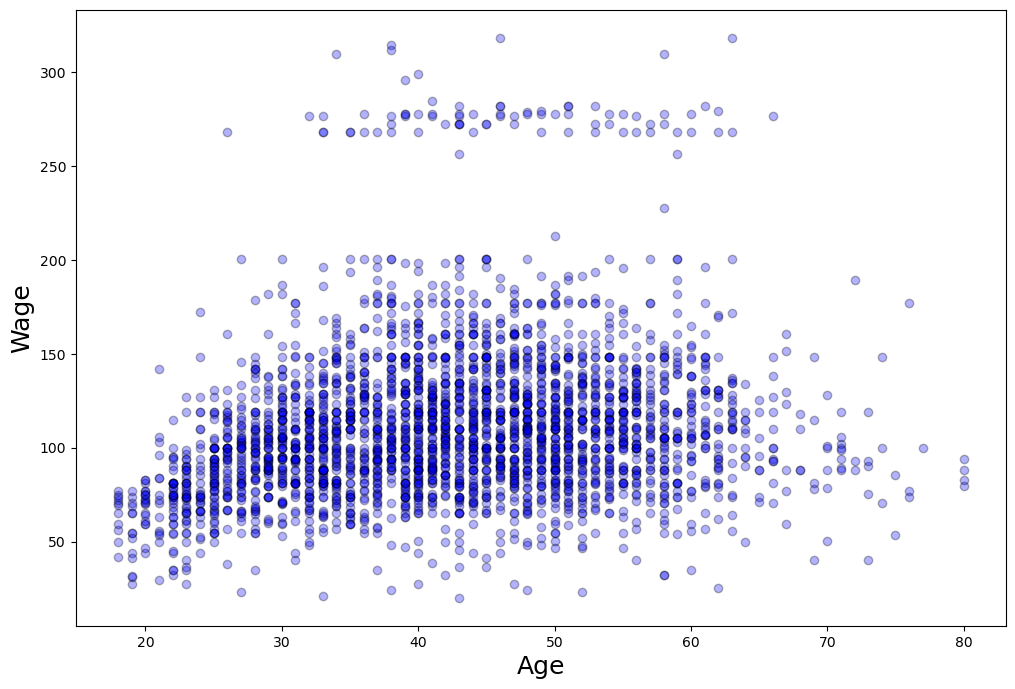

In [43]:
# Visualize the relationship b/w age and wage
size = plt.figure(figsize = (12,8))

# Training data
_ = plt.scatter(X_age, y_wage, facecolor='blue', edgecolor='k', alpha=0.3)

# Test data
#_ = plt.scatter(test_x, test_y, facecolor = "gray", alpha = .5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Wage', fontsize=18)
plt.show()

#### **B.1.3. Perform polynomial regression to predict wage using age. Use cross-validation to select the optimal degree d for the polynomial**

In [44]:
#X_age, y_wage

k=5
kf = KFold(n_splits=k, shuffle=True, random_state=47)

rmses = []

'''
dgr=2
print("* For degree :", dgr, ":")
polynomial_features = PolynomialFeatures(degree=(dgr))

#X_age2=np.array(X_age).reshape(-1,1)
X_age_poly = polynomial_features.fit_transform(X_age)

print(X_age)
print(X_age_poly[0])
print(type(X_age))
print(type(X_age_poly))
#X_age_poly2 = np.array(X_age_poly)[:,2].reshape(-1,1) #print()
print("X_age_poly.shape:", X_age_poly.shape)
#print("X_age_poly2.shape:", X_age_poly2.shape)

#y_wage2=np.array(y_wage).reshape(-1,1)
#print("y_wage2.shape:", y_wage2.shape)

cross_val_score(eqv_lnr_model, X_age_poly, y_wage, cv=kf, scoring='neg_mean_squared_error')
'''
# for degrees, test for range 1 to 10
for dgr in range(1,11):
  polynomial_features = PolynomialFeatures(degree=dgr)
  #print(polynomial_features)
  #X_age2=np.array(X_age).reshape(-1,1)
  X_age_poly = polynomial_features.fit_transform(X_age)
  print('original feature:', X_age.shape)
  print('polynomial features',X_age_poly.shape)

  eqv_lnr_model = linear_model.LinearRegression()
  eqv_lnr_model.fit(X_age_poly, y_wage)
  print("eqv_lnr_model.coef_", eqv_lnr_model.coef_)
  print("eqv_lnr_model.intercept_", eqv_lnr_model.intercept_)

  this_degree_rmses = -1*cross_val_score(eqv_lnr_model, X_age_poly, y_wage, cv=kf, scoring='neg_mean_squared_error')
  rmses_mean = round(this_degree_rmses.mean(),3)
  rmses.append(rmses_mean)
  print("* For degree :", dgr, ":", str(rmses_mean))

  print("==================================================================")
  #eqv_lnr_model.intercept_, eqv_lnr_model.coef_
  #print(X_age)
  #print('polynomial features',X_age_poly[0])

  #print(X_age)
  #print(X_age_poly[0])
  #print(type(X_age))
  #print(type(X_age_poly))
  #X_age_poly2 = np.array(X_age_poly)[:,2].reshape(-1,1) #print()
  #print("X_age_poly.shape:", X_age_poly.shape)
  #print("X_age_poly2.shape:", X_age_poly2.shape)

  #y_wage2=np.array(y_wage).reshape(-1,1)
  #print("y_wage2.shape:", y_wage2.shape)

  #print(X_age_poly.shape)
  #print(X_age_poly[0].shape)
  #cdf = pd.DataFrame(data=X_age_poly, index=[i for i in range(X_age_poly.shape[0])], columns=['f'+str(i) for i in range(X_age_poly.shape[1])])
  ###print(eqv_lnr_model.coef_.shape)
  #data_=eqv_lnr_model.coef_
  #index_=['x'+str(i) for i in range(dgr)]
  #columns_=["Coefficients"] #['f'+str(i) for i in range(X_age_poly.shape[1])
  #print(data_.shape, index_.shape, columns_.shape)
  #cdf = pd.DataFrame(data=data_, index=index_, columns=columns_)
  #print(cdf)
  #this_degree_r2s = cross_val_score(eqv_lnr_model, X_age_poly, y_wage, cv=kf, scoring='r2')
  #r2s.append(this_degree_r2s.mean())
  #rmses.append(cross_val_score(eqv_lnr_model, X_age_poly, y_wage, cv=kf, scoring='neg_mean_squared_error'))
  #r2s.append(cross_val_score(eqv_lnr_model, X_age_poly, y_wage, cv=kf, scoring='r2'))

print("Best RMSE:",min(rmses)," at degree: ", rmses.index(min(rmses))+1)
#print("Best R2:",max(r2s)," at degree: ", r2s.index(max(r2s))+1)

print("Worst RMSE:",max(rmses)," at degree: ", rmses.index(max(rmses))+1)
#print("Worst r2s:",min(r2s)," at degree: ", r2s.index(min(r2s))+1)

'\ndgr=2\nprint("* For degree :", dgr, ":")\npolynomial_features = PolynomialFeatures(degree=(dgr))\n\n#X_age2=np.array(X_age).reshape(-1,1)\nX_age_poly = polynomial_features.fit_transform(X_age)\n\nprint(X_age)\nprint(X_age_poly[0])\nprint(type(X_age))\nprint(type(X_age_poly))\n#X_age_poly2 = np.array(X_age_poly)[:,2].reshape(-1,1) #print()\nprint("X_age_poly.shape:", X_age_poly.shape)\n#print("X_age_poly2.shape:", X_age_poly2.shape)\n\n#y_wage2=np.array(y_wage).reshape(-1,1)\n#print("y_wage2.shape:", y_wage2.shape)\n\ncross_val_score(eqv_lnr_model, X_age_poly, y_wage, cv=kf, scoring=\'neg_mean_squared_error\')\n'

original feature: (3000, 1)
polynomial features (3000, 2)


LinearRegression()

eqv_lnr_model.coef_ [0.         0.70727593]
eqv_lnr_model.intercept_ 81.70473544394638
* For degree : 1 : 1675.263
original feature: (3000, 1)
polynomial features (3000, 3)


LinearRegression()

eqv_lnr_model.coef_ [ 0.          5.29403003 -0.05300507]
eqv_lnr_model.intercept_ -10.42522426202855
* For degree : 2 : 1599.233
original feature: (3000, 1)
polynomial features (3000, 4)


LinearRegression()

eqv_lnr_model.coef_ [ 0.00000000e+00  1.01899915e+01 -1.68028587e-01  8.49452197e-04]
eqv_lnr_model.intercept_ -75.24391422396816
* For degree : 3 : 1594.36
original feature: (3000, 1)
polynomial features (3000, 5)


LinearRegression()

eqv_lnr_model.coef_ [ 0.00000000e+00  2.12455205e+01 -5.63859313e-01  6.81068771e-03
 -3.20383037e-05]
eqv_lnr_model.intercept_ -184.15417977307288
* For degree : 4 : 1592.453
original feature: (3000, 1)
polynomial features (3000, 6)


LinearRegression()

eqv_lnr_model.coef_ [ 0.00000000e+00  3.99304398e+00  2.75976776e-01 -1.26497898e-02
  1.83462216e-04 -9.15709436e-07]
eqv_lnr_model.intercept_ -49.704625259062155
* For degree : 5 : 1591.998
original feature: (3000, 1)
polynomial features (3000, 7)


LinearRegression()

eqv_lnr_model.coef_ [ 0.00000000e+00 -9.31451757e+01  6.25695284e+00 -2.00632224e-01
  3.37390777e-03 -2.87232730e-05  9.75186075e-08]
eqv_lnr_model.intercept_ 577.8030683281572
* For degree : 6 : 1591.457
original feature: (3000, 1)
polynomial features (3000, 8)


LinearRegression()

eqv_lnr_model.coef_ [ 0.00000000e+00  1.60014389e+02 -1.26636985e+01  5.54652278e-01
 -1.40548847e-02  2.04301487e-04 -1.57778996e-06  5.00747416e-09]
eqv_lnr_model.intercept_ -815.4246983936323
* For degree : 7 : 1591.455
original feature: (3000, 1)
polynomial features (3000, 9)


LinearRegression()

eqv_lnr_model.coef_ [ 0.00000000e+00  8.27263212e-02  9.59609290e-01 -8.56346219e-02
  4.14173524e-03 -1.16567177e-04  1.85755408e-06 -1.54499917e-08
  5.19745358e-11]
eqv_lnr_model.intercept_ -23.666346247141078
* For degree : 8 : 1591.706
original feature: (3000, 1)
polynomial features (3000, 10)


LinearRegression()

eqv_lnr_model.coef_ [ 0.00000000e+00  4.88457579e-06  1.23524051e-04  1.14456294e-03
  6.69727689e-04 -4.29557442e-05  1.04515453e-06 -1.20029093e-08
  6.18847450e-11 -9.90317240e-14]
eqv_lnr_model.intercept_ 35.27694260165252
* For degree : 9 : 1591.782
original feature: (3000, 1)
polynomial features (3000, 11)


LinearRegression()

eqv_lnr_model.coef_ [ 0.00000000e+00 -2.29377852e-06  1.27085913e-06  2.01071473e-05
  1.68003052e-04  1.67582330e-05 -1.69395278e-06  5.36216344e-08
 -8.10316859e-10  6.00539446e-12 -1.75807419e-14]
eqv_lnr_model.intercept_ 44.97828738208726
* For degree : 10 : 1591.595
Best RMSE: 1591.455  at degree:  7
Worst RMSE: 1675.263  at degree:  1


In [45]:
'''
x_train = np.array(age_x).reshape(-1,1)

# construct polynomial features based on degree
rmses = []
r2s = []
for dgr in range(1,11):
  polynomial_features = PolynomialFeatures(degree=(dgr))
  age_x_poly = polynomial_features.fit_transform(x_train)
  print(x_train_poly.shape)

  # Fit the polynomial regression model
  eqv_lnr_model = linear_model.LinearRegression()
  eqv_lnr_model.fit(x_train_poly, train_y)
  y_poly_pred = eqv_lnr_model.predict(x_train_poly)

  # Evaluate the model
  rmse = np.sqrt(mean_squared_error(train_y, y_poly_pred))
  r2 = r2_score(train_y, y_poly_pred)
  rmses.append(rmse)
  r2s.append(r2)
  print("RMSE:", rmse, "R2: ", r2)

print("Best RMSE:",min(rmses)," at degree: ", rmses.index(min(rmses))+1)
print("Best R2:",max(r2s)," at degree: ", r2s.index(max(r2s))+1)

print("Worst RMSE:",max(rmses)," at degree: ", rmses.index(max(rmses))+1)
print("Worst r2s:",min(r2s)," at degree: ", r2s.index(min(r2s))+1)

#y_poly_pred.shape
# rms is the square root of mean squared error
#rms = sqrt(mean_squared_error(test_y, ypred))
#print(rms)

'''

'''
for i in range(1,10):
    polynomial_features = PolynomialFeatures(degree=i)

    x_train_p = polynomial_features.fit_transform(x_train)
    x_train_p.shape
    model_poly = sm.OLS(train_y, x_train_p).fit()
    ypred = model_poly.predict(x_train_p)
    ypred.shape
    # rms is the square root of mean squared error
    #rms = sqrt(mean_squared_error(test_y, ypred))
    #print(rms)
'''

'\nx_train = np.array(age_x).reshape(-1,1)\n\n# construct polynomial features based on degree\nrmses = []\nr2s = []\nfor dgr in range(1,11):\n  polynomial_features = PolynomialFeatures(degree=(dgr))\n  age_x_poly = polynomial_features.fit_transform(x_train)\n  print(x_train_poly.shape)\n\n  # Fit the polynomial regression model\n  eqv_lnr_model = linear_model.LinearRegression()\n  eqv_lnr_model.fit(x_train_poly, train_y)\n  y_poly_pred = eqv_lnr_model.predict(x_train_poly)\n\n  # Evaluate the model\n  rmse = np.sqrt(mean_squared_error(train_y, y_poly_pred))\n  r2 = r2_score(train_y, y_poly_pred)\n  rmses.append(rmse)\n  r2s.append(r2)\n  print("RMSE:", rmse, "R2: ", r2)\n\nprint("Best RMSE:",min(rmses)," at degree: ", rmses.index(min(rmses))+1)\nprint("Best R2:",max(r2s)," at degree: ", r2s.index(max(r2s))+1)\n\nprint("Worst RMSE:",max(rmses)," at degree: ", rmses.index(max(rmses))+1)\nprint("Worst r2s:",min(r2s)," at degree: ", r2s.index(min(r2s))+1)\n\n#y_poly_pred.shape\n# rms is th

'\nfor i in range(1,10):\n    polynomial_features = PolynomialFeatures(degree=i)\n\n    x_train_p = polynomial_features.fit_transform(x_train)\n    x_train_p.shape\n    model_poly = sm.OLS(train_y, x_train_p).fit()\n    ypred = model_poly.predict(x_train_p)\n    ypred.shape\n    # rms is the square root of mean squared error\n    #rms = sqrt(mean_squared_error(test_y, ypred))\n    #print(rms)\n'

#### **B.1.4. What degree was chosen?**

Degree 7 was chosen as it has the Minimum RMSE (= 1591.455)

#### **B.1.5. Make a plot of the resulting polynomial fit to the data.**

original feature: (3000, 1)
polynomial features (3000, 8)


LinearRegression()

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Wage')

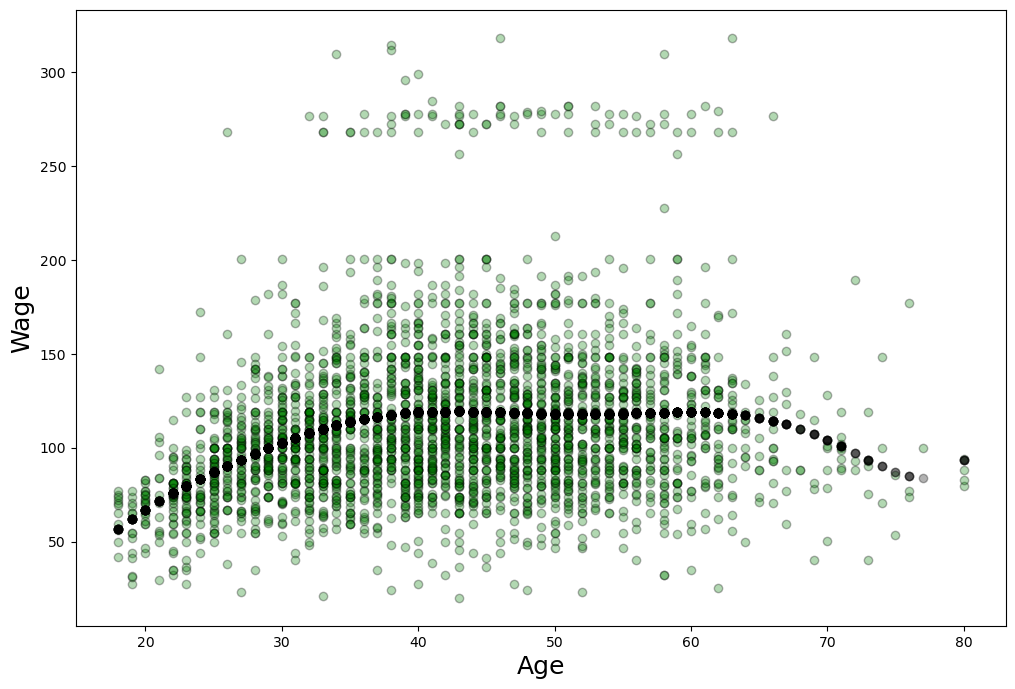

In [46]:
polynomial_features7 = PolynomialFeatures(degree=7)
#print(polynomial_features)
#X_age2=np.array(X_age).reshape(-1,1)
X_age_poly7 = polynomial_features7.fit_transform(X_age)
print('original feature:', X_age.shape)
print('polynomial features',X_age_poly7.shape)

eqv_lnr_model7 = linear_model.LinearRegression()
eqv_lnr_model7.fit(X_age_poly7, y_wage)
#print("eqv_lnr_model.coef_", eqv_lnr_model7.coef_)
#print("eqv_lnr_model.intercept_", eqv_lnr_model7.intercept_)

y_predict = eqv_lnr_model7.predict(X_age_poly7)
# Visualize the relationship b/w age and wage
size = plt.figure(figsize = (12,8))

# Training data
_ = plt.scatter(X_age, y_wage, facecolor='green', edgecolor='k', alpha=0.3)
_ = plt.scatter(X_age, y_predict, facecolor='black', edgecolor='k', alpha=0.3)

# Test data
#_ = plt.scatter(test_x, test_y, facecolor = "gray", alpha = .5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Wage', fontsize=18)
plt.show()

### **B.2. Fit a step function to predict wage using age , and perform cross-validation to choose the optimal number of cuts. Make a plot of the fit obtained.**

#### **B.2.1. Fit a step function to predict wage using age , and perform cross-validation to choose the optimal number of cuts**

In [47]:
#X_age, y_wage

k=5
kf = KFold(n_splits=k, shuffle=True, random_state=47)

rmses = []


#### **B.2.2. Make a plot of the fit obtained**

Part C <a name='PartC' />


## **Part C** <font color="blue">(4 points)</font>
Apply SVM and random forests to a data set of your choice. Be sure to fit the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to each other? Which of them yields the best performance?


### **C.1.1. A data set of my choice:**

#### Titanic Data Description - Source: https://www.kaggle.com/c/titanic/data
***Passenger ID*** to identify the passenger, numerical feature (Passenger ID/Ticket Number).

***Survived*** is our label, as we can see is a binary feature, 1 if survived and 0 otherwise.

***Pclass*** is the Ticket class (1 = 1st (Upper), 2 = 2nd (Middle), 3 = 3rd (lower))

***Name *** is the name of the passenger

***Sex*** is the gender of the passenger

***Age*** is the age in years

***Sibsp*** is the number of siblings / spouses aboard the Titanic

***Parch*** is the number of parents / children aboard the Titanic

***Ticket*** is the ticket number

***Fare*** is the Passenger fare

***Cabin*** is the cabin number

***Embarked*** means Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton

#### Exploring Data & Preparing Data: EDA & fixing data issues

##### Helper Function(s)

In [48]:
# for each column, display column name & its distinct contents ONLY in case the column has less than 6 unique values
def get_columns_and_distinct_values(df,nunique_target=5):
  str_=""
  ret=[]
  for column in df:
      columnSeriesObj = df[column]
      nunique_this_clmn = columnSeriesObj.nunique()
      str_ = 'Column Name: ' + column + ', Column Type: ' + str(df[column].dtype)
      if nunique_this_clmn == 1:
          str_ = str_ + ', Column has one unique value only and can be dropped from the dataframe'
          ret.append(str_)
          ret.append("------------------------------------------------------------")
      elif nunique_this_clmn <= nunique_target:
        str_ = str_ + ', Column has ' + str(columnSeriesObj.nunique()) + ' unique value(s) : '
        for val in columnSeriesObj.unique():
          str_ = str_  + str(val) + ","
        str_ = str_[:len(str_)-1]
        ret.append(str_)
        ret.append("------------------------------------------------------------")
      else:
        str_ = str_ + ', Column has more than ' + str(nunique_target) + ' unique values'
      #ret.append(str_)
      #ret.append("==========================================================================")

  print("==========================================================================")
  columns_of_type_object = df.select_dtypes(include=['object']).columns
  print("*** Columns of type object are:", columns_of_type_object)
  print("==========================================================================")
  columns_of_a_single_unique_value = df.columns[df.nunique() == 1]
  print("*** Columns of a single unique value are:", columns_of_a_single_unique_value, " can be dropped")
  print("==========================================================================")
  return ret

##### Load data

In [49]:
# load train data from train.csv
titanic_train_df = pd.read_csv(r'titanic_train.csv')
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
titanic_train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

##### EDA

In [51]:
titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
titanic_train_df.shape

(891, 12)

In [53]:
# check for NULL values
if titanic_train_df.isnull().any().sum() > 0:
    print("There are:" , titanic_train_df.isnull().any().sum(), "Null values in the train data")
else:
    print("Train data is good - There is no null values in any of the columns")

There are: 3 Null values in the train data


In [54]:
titanic_train_df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [55]:
titanic_train_df.drop(['Name','Ticket','PassengerId'], axis=1, inplace=True)

In [56]:
print ("titanic_train_df:")
#print("null values:\n", titanic_train_df.isnull().sum())
print("duplicated records", titanic_train_df.duplicated().sum())

titanic_train_df:
duplicated records 107


###### Embarked Feature / Two Records with Nan values - replace the 2 NULL values in embarked with S = Southampton (as most passengers on Titanic embarked from this port)

In [57]:
# Two records in titanic_train_df with Nan in Embarked feature  - will be dropped from the dataframe
titanic_train_df[titanic_train_df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,female,38.0,0,0,80.0,B28,NaN
829,1,1,female,62.0,0,0,80.0,B28,NaN


In [58]:
print(titanic_train_df['Embarked'].value_counts())
# most passengers are emabrked from S = Southampton (Three ports of Embarkation C = Cherbourg; Q = Queenstown; S = Southampton)

# replace the 2 NULL values in embarked with S = Southampton (as most passengers on Titanic embarked from this port)
titanic_train_df.loc[titanic_train_df['Embarked'].isnull(),'Embarked'] = 'S'

print(titanic_train_df['Embarked'].value_counts())

titanic_train_df[titanic_train_df['Embarked'].isnull()]

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked


###### Cabin Feature / replace missing values in titanic_train_df['Cabin'] with letter 'U' for unknown

In [59]:
print("null values in the Cabin Feature:\n", titanic_train_df.isnull().sum()['Cabin'], "Records")

null values in the Cabin Feature:
 687 Records


In [60]:
titanic_train_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [61]:
# keep first letter only in the Cabin
titanic_train_df['Cabin'] = titanic_train_df['Cabin'].str[0]
titanic_train_df['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [62]:
# replace missing values in titanic_train_df['Cabin'] with letter 'U' for unknown
titanic_train_df['Cabin'].fillna('U', inplace=True)

In [63]:
titanic_train_df['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

###### Age Feature / replace missing values in titanic_train_df['Age'] with the avergae of age

In [64]:
print("null values in the Age Feature:\n", titanic_train_df.isnull().sum()['Age'], "Records")

null values in the Age Feature:
 177 Records


In [65]:
# Fill missing/Nan values in Age with average age
titanic_train_df['Age'].fillna(titanic_train_df['Age'].mean(), inplace=True)  # 29.642093
print("null values in the Age Feature:\n", titanic_train_df.isnull().sum()['Age'], "Records")
#titanic_train_df['Age'].unique()


null values in the Age Feature:
 0 Records


In [66]:
# Check again after fixing missing records
titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [67]:
titanic_train_df.describe(include = 'all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,9,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,U,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,687,646
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,13.002015,1.102743,0.806057,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,29.699118,0.000000,0.000000,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN,NaN


In [68]:
titanic_train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,U,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,U,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,U,S


In [69]:
ret=get_columns_and_distinct_values(titanic_train_df,10)
for str_ in ret:
  print(str_)

*** Columns of type object are: Index(['Sex', 'Cabin', 'Embarked'], dtype='object')
*** Columns of a single unique value are: Index([], dtype='object')  can be dropped
Column Name: Survived, Column Type: int64, Column has 2 unique value(s) : 0,1
------------------------------------------------------------
Column Name: Pclass, Column Type: int64, Column has 3 unique value(s) : 3,1,2
------------------------------------------------------------
Column Name: Sex, Column Type: object, Column has 2 unique value(s) : male,female
------------------------------------------------------------
Column Name: SibSp, Column Type: int64, Column has 7 unique value(s) : 1,0,3,4,2,5,8
------------------------------------------------------------
Column Name: Parch, Column Type: int64, Column has 7 unique value(s) : 0,1,2,5,3,4,6
------------------------------------------------------------
Column Name: Cabin, Column Type: object, Column has 9 unique value(s) : U,C,E,G,D,A,B,F,T
-----------------------------

###### Use data for ***Fare & Cabin*** to provide ***better/more accurate*** values for the "U = Unknown" cabins for some/many records

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Box plot for Fare per Cabin - Titanic Train df')

<Axes: title={'center': 'Box plot for Fare per Cabin - Titanic Train df'}, xlabel='Cabin', ylabel='Fare'>

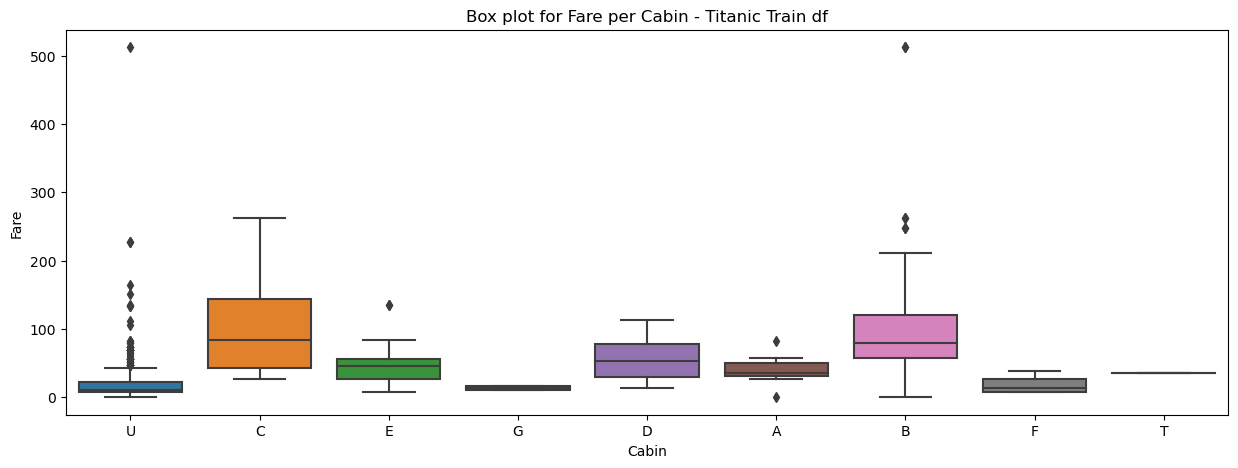

In [70]:
# plot using box plot to check for outliers of Fare for the Unknown Cabins (Train df)
plt.figure(figsize=(15,5))
plt.title("Box plot for Fare per Cabin - Titanic Train df")
sns.boxplot(x='Cabin', y='Fare',data=titanic_train_df)
plt.show()

In [71]:
def cbnFareDataToDataFrame(titanic_df):
  CntCbnFare, MinCbnFare, MaxCbnFare, AvgCbnFare, MedianCbnFare, ModeCbnFare = [],[],[],[],[],[]
  for cbn in titanic_df['Cabin'].unique(): #'ABCDEFGTU':
    condition = (titanic_df['Cabin'] == cbn) & (titanic_df['Fare']!=0)

    #strCbnFareInfo = "For Cabin: " + cbn

    cnt=titanic_df[condition]['Fare'].count()
    #strCbnFareInfo += " ===> Count=" + str(cnt)
    CntCbnFare.append(cnt)

    min_=round(titanic_df[condition]['Fare'].min(),2)
    #strCbnFareInfo += ", Min Fare=" + str(min)
    MinCbnFare.append(min_)

    max_=round(titanic_df[condition]['Fare'].max(),2)
    #strCbnFareInfo += ", Max=" + str(max_)
    MaxCbnFare.append(max_)

    Mean_=round(titanic_df[condition]['Fare'].mean(),2)
    #strCbnFareInfo += ", Mean=" + str(Mean_)
    AvgCbnFare.append(Mean_)

    Median_=round(titanic_df[condition]['Fare'].median(),2)
    #strCbnFareInfo += ", Median=" + str(Median_)
    MedianCbnFare.append(Median_)

    Mode_=round(titanic_df[condition]['Fare'].mode().mean(),2)
    #strCbnFareInfo += ", Mode=" + str(Mode_)
    ModeCbnFare.append(Mode_)

  #print(strCbnFareInfo)

  dict = {'Cbn': list(titanic_df['Cabin'].unique()), 'Count': CntCbnFare, 'Min': MinCbnFare, 'Max': MaxCbnFare, 'Mean': AvgCbnFare, 'Median': MedianCbnFare, 'Mode': ModeCbnFare}
  cbnFareDf = pd.DataFrame(dict)
  cbnFareDf.head(len(titanic_df['Cabin'].unique()))

  #print(cbnFareDf.sort_values(by=['Median','Mean', 'Mode'], ascending=[True,True, True]))
  return cbnFareDf

In [72]:
cbnFareTrainDf = cbnFareDataToDataFrame(titanic_train_df)
#cbnFareDf.head(len('ABCDEFGTU'))
print(cbnFareTrainDf.sort_values(by=['Mean','Median','Mode'], ascending=[False,False, False]))

  Cbn  Count    Min     Max    Mean  Median    Mode
6   B     45   5.00  512.33  118.55   80.00  120.00
1   C     59  26.55  263.00  100.15   83.47  126.52
4   D     33  12.88  113.28   57.24   53.10   80.13
2   E     32   8.05  134.50   46.03   45.18   44.16
5   A     14  26.00   81.86   42.45   37.55   35.50
8   T      1  35.50   35.50   35.50   35.50   35.50
0   U    675   4.01  512.33   19.50   11.13    8.05
7   F     13   7.65   39.00   18.70   13.00   16.82
3   G      4  10.46   16.70   13.58   13.58   13.58


In [73]:
# first obsevation (only for titanic train) that there is only one entry for cabin T so high probability
# it is a data-issue - will fix to Cabin A as same Mode & closed Median & Mean
titanic_train_df.loc[titanic_train_df['Cabin'] == 'T', 'Cabin'] = 'A'

cbnFareTrainDf = cbnFareDataToDataFrame(titanic_train_df)
print(cbnFareTrainDf.sort_values(by=['Mean','Median','Mode'], ascending=[False,False, False]))

  Cbn  Count    Min     Max    Mean  Median    Mode
6   B     45   5.00  512.33  118.55   80.00  120.00
1   C     59  26.55  263.00  100.15   83.47  126.52
4   D     33  12.88  113.28   57.24   53.10   80.13
2   E     32   8.05  134.50   46.03   45.18   44.16
5   A     15  26.00   81.86   41.99   35.50   35.50
0   U    675   4.01  512.33   19.50   11.13    8.05
7   F     13   7.65   39.00   18.70   13.00   16.82
3   G      4  10.46   16.70   13.58   13.58   13.58


In [74]:
# second obsevation that there are many entries for cabin U which has many outliers (also from the above boxplot)
# so fix this data issue by assigning a different cabin based on fare Mean
#print(cbnFareTrainDf.sort_values(by=['Max'], ascending=[False]))

In [75]:
cndTrain1 = (titanic_train_df['Cabin'] == 'U')

cndTrain2 = (titanic_train_df['Fare'] > 100.15)
titanic_train_df.loc[cndTrain1 & cndTrain2, 'Cabin'] = 'B'

cndTrain2 = (titanic_train_df['Fare'] <= 100.15) & (titanic_train_df['Fare'] > 57.24)
titanic_train_df.loc[cndTrain1 & cndTrain2, 'Cabin'] = 'C'

cndTrain2 = (titanic_train_df['Fare'] <= 57.24) & (titanic_train_df['Fare'] > 46.03)
titanic_train_df.loc[cndTrain1 & cndTrain2, 'Cabin'] = 'D'

cndTrain2 = (titanic_train_df['Fare'] <= 46.03) & (titanic_train_df['Fare'] > 41.99)
titanic_train_df.loc[cndTrain1 & cndTrain2, 'Cabin'] = 'E'

cndTrain2 = (titanic_train_df['Fare'] <= 41.99) & (titanic_train_df['Fare'] > 18.70)
titanic_train_df.loc[cndTrain1 & cndTrain2, 'Cabin'] = 'A'

cndTrain2 = (titanic_train_df['Fare'] <= 18.70) & (titanic_train_df['Fare'] > 13.58)
titanic_train_df.loc[cndTrain1 & cndTrain2, 'Cabin'] = 'F'

cndTrain2 = (titanic_train_df['Fare'] <= 13.58) & (titanic_train_df['Fare'] > 7.65)
titanic_train_df.loc[cndTrain1 & cndTrain2, 'Cabin'] = 'G'

#print("For Training Data")
cbnFareTrainDf = cbnFareDataToDataFrame(titanic_train_df)
print(cbnFareTrainDf.sort_values(by=['Max'], ascending=[False]))

  Cbn  Count    Min     Max    Mean  Median    Mode
7   B     55   5.00  512.33  131.61   91.08  120.00
1   C     79  26.55  263.00   92.87   73.50   69.55
3   E     33   8.05  134.50   45.92   42.40   44.16
6   D     50  12.88  113.28   55.33   52.55   56.50
4   A    178  18.75   81.86   28.29   26.25   26.00
5   F     79   7.65   39.00   15.95   15.50   16.10
2   G    324   7.72   16.70    9.21    8.05    8.05
0   U     78   4.01    7.65    7.12    7.23    7.23


<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Box plot for Fare per Cabin')

<Axes: title={'center': 'Box plot for Fare per Cabin'}, xlabel='Cabin', ylabel='Fare'>

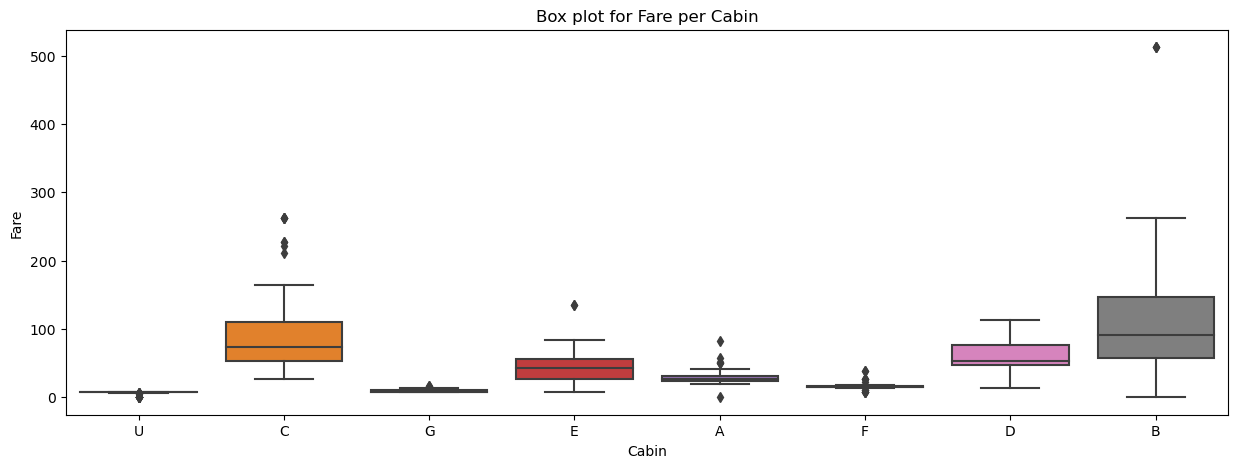

In [76]:
# plot using box plot to check for Fare per Cabin after above step (Train)
plt.figure(figsize=(15,5))
plt.title("Box plot for Fare per Cabin")
sns.boxplot(x='Cabin', y='Fare',data=titanic_train_df)
plt.show()

In [77]:
titanic_train_df2 = pd.get_dummies(titanic_train_df)
titanic_train_df2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,False,False,False,False,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,False,False,True,False,False,False,False,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,False,False,False,False,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True,False,False,False,False,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,False,False,False,False,True,False,False,False,True


### **C.1.2. Data split: Traing set & Test set**

In [78]:
X_tnc_train=titanic_train_df2.drop(['Survived'],axis=1)
y_tnc_train=titanic_train_df2['Survived']

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X_tnc_train,y_tnc_train,test_size=0.2)

# scale data separately for train and test
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **C.1.3. Applying Random Forest**

In [80]:
rfc= RandomForestClassifier(n_estimators=100,random_state=47)
rfc.fit(X_train_scaled,y_train)
y_train_predict_rfc=rfc.predict(X_train_scaled)

print("train accuracy_score", accuracy_score(y_train, y_train_predict_rfc))
print("train f1_score", f1_score(y_train, y_train_predict_rfc, average="macro"))
print("train precision_score",precision_score(y_train, y_train_predict_rfc, average="macro"))   # "macro" ---> does not take into account imbalance
print("train recall_score",recall_score(y_train, y_train_predict_rfc, average="macro"))
print("test rfc score",rfc.score(X_train_scaled,y_train))

RandomForestClassifier(random_state=47)

train accuracy_score 0.9845505617977528
train f1_score 0.9836737756895183
train precision_score 0.985394649864866
train recall_score 0.9820668794043346
test rfc score 0.9845505617977528


In [81]:
y_test_predict_rfc = rfc.predict(X_test_scaled)
print("test accuracy_score", accuracy_score(y_test, y_test_predict_rfc))
print("test f1_score",f1_score(y_test, y_test_predict_rfc, average="macro"))
print("test precision_score",precision_score(y_test, y_test_predict_rfc, average="macro"))   # "macro" ---> does not take into account imbalance
print("test recall_score",recall_score(y_test, y_test_predict_rfc, average="macro"))
print("test rfc score",rfc.score(X_test_scaled,y_test))

test accuracy_score 0.8100558659217877
test f1_score 0.7932744565217391
test precision_score 0.7978356768679349
test recall_score 0.7896889246446769
test rfc score 0.8100558659217877


[  1   2   4   8  16  32  64 128 256]


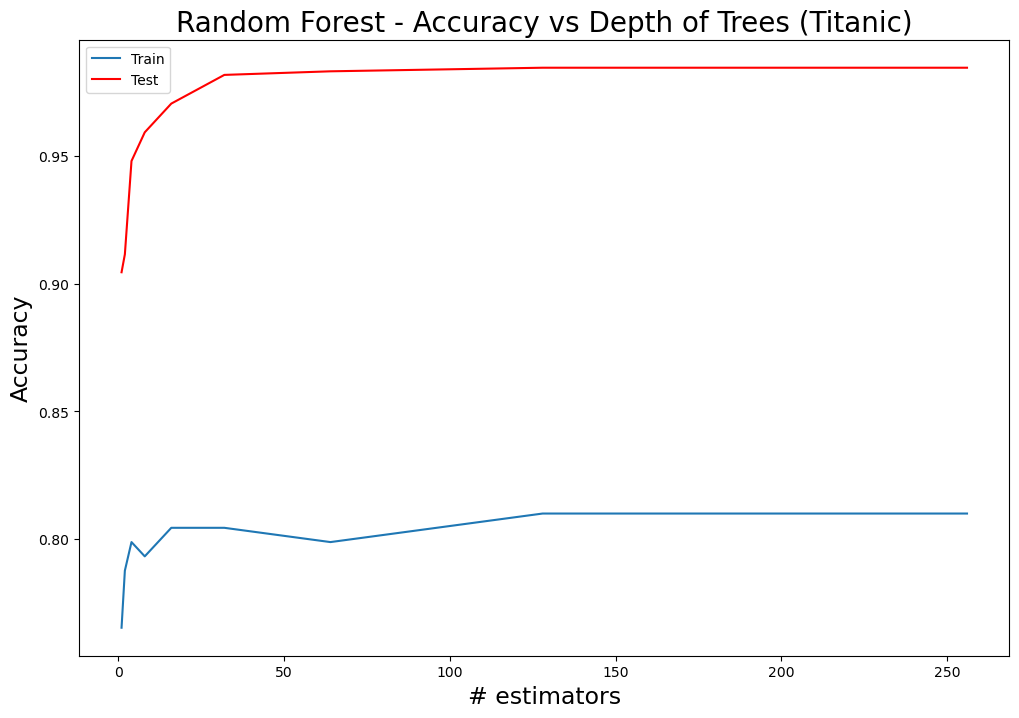

In [82]:
figsize = plt.figure(figsize = (12,8))
# Initialize the accuracy_score vector
acc = []              # test accuracy
acc_train = []        # train accuracy
estimators = 2 ** np.arange(9)
print(estimators)

# Calculate accuracy score on the test set for different values for the n_estimators parameter
for est in estimators:
    # Fit the Regression Tree
    rfc2 = RandomForestClassifier(n_estimators=est, random_state=47) #max_depth=i,
    rfc2.fit(X_train_scaled,y_train)
    # Predict on the test set
    y_pred = rfc2.predict(X_test_scaled)
    # Compute the accuracy
    score = accuracy_score(y_test, y_pred)
    acc.append(score)
    acc_train.append(accuracy_score(y_train, rfc2.predict(X_train_scaled)))

# Plot results
#print(acc)
#print(acc_train)
plot = plt.plot(estimators, acc, '-', estimators, acc_train, 'r')
#plot = plt.plot(estimators, acc_train, 'b', label='Train')
#plot = plt.plot(estimators, acc, 'r', label='Test')
xlab = plt.xlabel('# estimators', fontsize = 17)
ylab = plt.ylabel('Accuracy', fontsize = 17)
plt.legend(['Train','Test'])
title = plt.title('Random Forest - Accuracy vs Depth of Trees (Titanic)', fontsize = 20);

#### ***Random Forest Accuracy Results***

In [83]:
# best value for estimators:
print("Using Random forest with different number of estimators, best accuracy was at", max(acc),"and it occurs when estimators=", estimators[acc.index(max(acc))])

Using Random forest with different number of estimators, best accuracy was at 0.8100558659217877 and it occurs when estimators= 128


### **C.1.4. Applying SVM**

In [84]:
svc=SVC(C=1000) #kernel='rbf',
svc.fit(X_train_scaled,y_train)

SVC(C=1000)

In [85]:
y_train_predict_svc=svc.predict(X_train_scaled)

print("train accuracy_score", accuracy_score(y_train, y_train_predict_svc))
print("train f1_score", f1_score(y_train, y_train_predict_svc, average="macro"))
print("train precision_score",precision_score(y_train, y_train_predict_svc, average="macro"))   # "macro" ---> does not take into account imbalance
print("train recall_score",recall_score(y_train, y_train_predict_svc, average="macro"))
print("test svc score",svc.score(X_train_scaled,y_train))

train accuracy_score 0.9143258426966292
train f1_score 0.9079781768102124
train precision_score 0.9183472551111573
train recall_score 0.9007944422284271
test svc score 0.9143258426966292


In [86]:
y_test_predict_svc = svc.predict(X_test_scaled )
print("test accuracy_score", accuracy_score(y_test, y_test_predict_svc))
print("test f1_score",f1_score(y_test, y_test_predict_svc, average="macro"))
print("test precision_score",precision_score(y_test, y_test_predict_svc, average="macro"))   # "macro" ---> does not take into account imbalance
print("test recall_score",recall_score(y_test, y_test_predict_svc, average="macro"))
print("test svc score",svc.score(X_test_scaled,y_test))

test accuracy_score 0.8268156424581006
test f1_score 0.8094763948497854
test precision_score 0.819138418079096
test recall_score 0.8029632609278627
test svc score 0.8268156424581006


[  1   2   4   8  16  32  64 128 256]


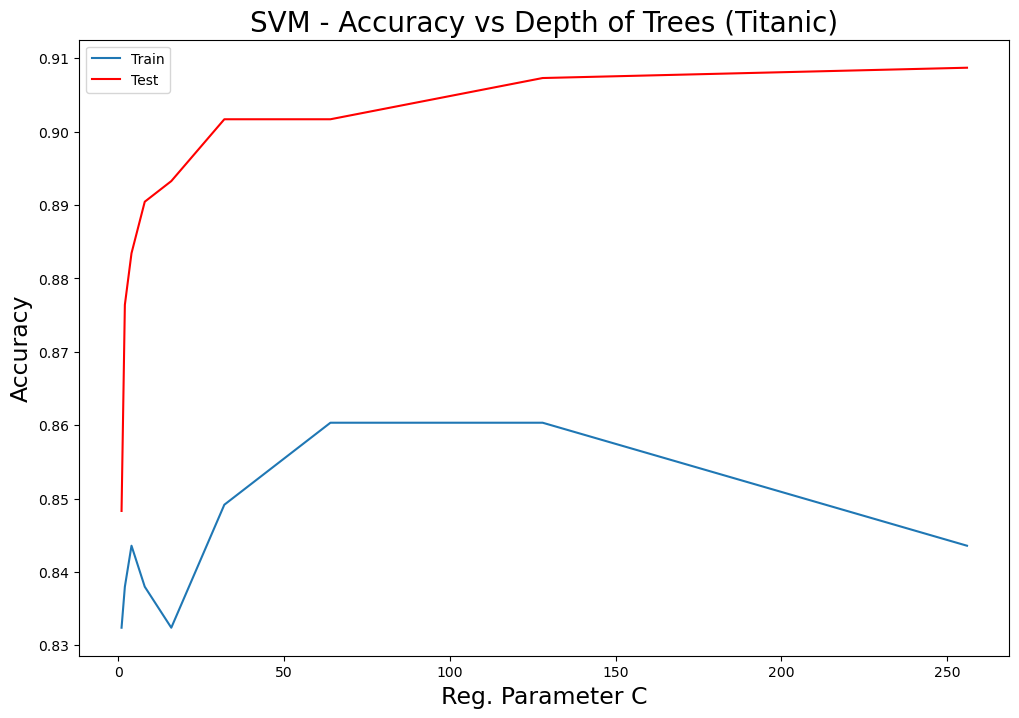

In [87]:
figsize = plt.figure(figsize = (12,8))
# Initialize the accuracy_score vector
acc = []              # test accuracy
acc_train = []        # train accuracy
reglCs = 2 ** np.arange(9)
print(reglCs)

# Calculate accuracy score on the test set for different values for the regularization parameter C
for C_param in reglCs:
    # Fit the Regression Tree
    svc2 = SVC(C=C_param) #max_depth=i,
    svc2.fit(X_train_scaled,y_train)
    # Predict on the test set
    y_pred = svc2.predict(X_test_scaled)
    # Compute the accuracy
    score = accuracy_score(y_test, y_pred)
    acc.append(score)
    acc_train.append(accuracy_score(y_train, svc2.predict(X_train_scaled)))

# Plot results
#print(acc)
#print(acc_train)
plot = plt.plot(reglCs, acc, '-', reglCs, acc_train, 'r')
#plot = plt.plot(reglCs, acc_train, 'b', label='Train')
#plot = plt.plot(reglCs, acc, 'r', label='Test')
xlab = plt.xlabel('Reg. Parameter C', fontsize = 17)
ylab = plt.ylabel('Accuracy', fontsize = 17)
plt.legend(['Train','Test'])
title = plt.title('SVM - Accuracy vs Depth of Trees (Titanic)', fontsize = 20);

#### ***SVM Accuracy Results***

In [88]:
# best value for estimators:
print("Using SVM with different values for the regularization parameter C, best accuracy was at", max(acc),"and it occurs when C=", reglCs[acc.index(max(acc))])

Using SVM with different values for the regularization parameter C, best accuracy was at 0.8603351955307262 and it occurs when C= 64


### **C.1.5. Based on above results (using the above parameters), SVM Model provides a better accuracy than the Random Forest model**

## **Part D** <font color="blue">(3 points)</font>

1. **<font color="blue">(1 point)</font>** Generate $2$-dimentional data with $500$ observations from $3$ Gaussian clusters.
2. **<font color="blue">(0.5 points)</font>** Use a scatterplot to visualize the produced data.
3. **<font color="blue">(1 point)</font>** Shuffle the data and use $K$-means, with $K=2,3,4$ to cluster the data.
4. **<font color="blue">(0.5 points)</font>** Visualize the results, separately.  


### **D.1. Generate  2-dimentional data with 500 observations from 3  Gaussian clusters.**

In [131]:
# Seed for reproducibility
np.random.seed(42)

# Parameters for Gaussian clusters
n_samples, n_dimesions, n_gaussian_clusters = 500, 2, 3

# Means and covariances for each cluster
means = np.array([[0, 0], [5, 5], [-5, 5]])
covariances = np.array([[[1, 0.5], [0.5, 1]], [[1, -0.3], [-0.3, 1]], [[0.5, 0], [0, 0.5]]])

x0, y0 = np.random.multivariate_normal(means[0], covariances[0], n_samples).T
x1, y1 = np.random.multivariate_normal(means[1], covariances[1], n_samples).T
x2, y2 = np.random.multivariate_normal(means[2], covariances[2], n_samples).T

x=np.concatenate((x0,x1,x2),axis=0)
y=np.concatenate((y0,y1,y2),axis=0)

print(x.shape,y.shape,x0.shape,x1.shape,x2.shape)

# Generate samples for each cluster
#X = np.vstack([np.random.multivariate_normal(mean, cov, n_samples // n_clusters) for mean, cov in zip(means, covariances)])

(1500,) (1500,) (500,) (500,) (500,)


In [140]:
data = pd.DataFrame(data=np.hstack((x.reshape(-1,1), y.reshape(-1,1))),columns=['x','y'])
print("data.info():", data.info())
print("=======================================")
print("data.shape:", data.shape)
print("=======================================")
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1500 non-null   float64
 1   y       1500 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB
data.info(): None
data.shape: (1500, 2)


,x,y
0,-0.361035,-0.499299
1,-1.322430,0.200600
2,0.319851,0.085714
3,-1.751356,-0.983921
4,0.135297,0.677857


### **D.2. Use a scatterplot to visualize the produced data.**

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 0.98, 'Illustration of three gaussian distributions (with and without labels)')

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

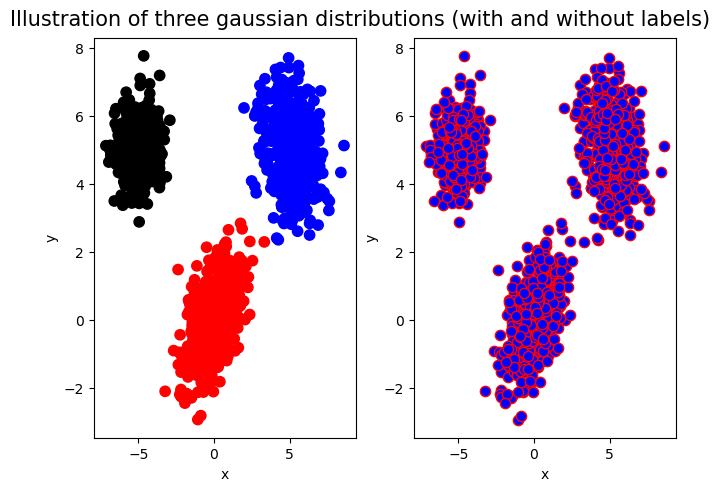

In [129]:
# Plot
color = np.array(["red" for i in range(n_samples)]+["blue" for i in range(n_samples)]+["black" for i in range(n_samples)])

fig, axs = plt.subplots(1, 2, constrained_layout=True)
axs[0].scatter(x, y,color=color,s=220, marker=".")
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
fig.suptitle('Illustration of three gaussian distributions (with and without labels)', fontsize=15)

axs[1].scatter(x,y, c="blue", s=220, marker=".", edgecolors = "red")
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

In [130]:
# Plot the generated data
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], s=30, cmap='viridis')
plt.title('Synthetic Data with Gaussian Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

<Figure size 800x600 with 0 Axes>

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 800x600 with 0 Axes>

Questions & Comments <a name='Q_C' />

## **Questions & Comments:**

### For part A
1. confirm using standardization ?

2. Confirm it is ok to use GridSearchCV for best tuning parameter - share logic

3. need clarification for "Does the best model chosen perform variable selection" A.4

4. not sure about the scope of the question as no final result required for predict (only fit done but no prediction - just logic for selecting best tuning parameter but no predict)

### For Part B
1. I understand that usually it is degree 3 that is best and as mentioned in the session/lab by Arbaaz, we ususally don't need to go over degree 3 but here in this question , degree 7 is the best (also very small improvement in RMSE or minor advantage over degree 6). so need to confirm that no missing steps or nothing wrong I did for the steps

***=> in the session - some comments provided for Part B (Jaafar question)***